In [13]:
import pandas as pd
import numpy as np
import scipy as sp
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv("input/white-wine-price-rating.csv")

In [3]:
data.columns

Index(['FullName', 'Winery', 'WineName', 'Year', 'Region', 'RegionalVariety',
       'VintageRating', 'VintageRatingCount', 'WineRating', 'WineRatingCount',
       'VintagePrice', 'WinePrice', 'VintageRatingPriceRatio',
       'WineRatingPriceRatio'],
      dtype='object')

In [4]:
data.size


64316

In [6]:
data['Region'].nunique()

32

In [8]:
data.describe()


,VintageRating,VintageRatingCount,WineRating,WineRatingCount,VintagePrice,WinePrice,VintageRatingPriceRatio,WineRatingPriceRatio
count,4594.000000,4594.000000,4594.000000,4594.000000,4594.000000,4594.000000,4594.000000,4594.000000
mean,4.208272,131.526774,4.159599,1255.237048,103.875294,103.875294,0.101727,0.100233
std,0.171763,233.877452,0.175609,1984.197756,437.853292,437.853292,0.054872,0.053590
min,3.900000,25.000000,3.500000,28.000000,10.500000,10.500000,0.000512,0.000512
25%,4.100000,40.000000,4.000000,368.000000,28.480000,28.480000,0.057539,0.057333
50%,4.200000,69.000000,4.100000,710.000000,41.670000,41.670000,0.100024,0.098868
75%,4.300000,138.000000,4.300000,1425.500000,74.677500,74.677500,0.144828,0.142809
max,4.900000,6883.000000,4.700000,37863.000000,9180.000000,9180.000000,0.380952,0.361905


In [9]:
data.dtypes

FullName                    object
Winery                      object
WineName                    object
Year                        object
Region                      object
RegionalVariety             object
VintageRating              float64
VintageRatingCount           int64
WineRating                 float64
WineRatingCount              int64
VintagePrice               float64
WinePrice                  float64
VintageRatingPriceRatio    float64
WineRatingPriceRatio       float64
dtype: object

In [10]:
def category_count(attribute):
    print('"{}" attribute - number of categories: {}'.format(attribute, data[attribute].nunique()))
category_count('FullName')
category_count('Winery')
category_count('Region')
category_count('Winery')
category_count('Year')
category_count('WineRating')
category_count('WinePrice')

"FullName" attribute - number of categories: 4593
"Winery" attribute - number of categories: 1242
"Region" attribute - number of categories: 32
"Winery" attribute - number of categories: 1242
"Year" attribute - number of categories: 35
"WineRating" attribute - number of categories: 13
"WinePrice" attribute - number of categories: 1987


In [12]:
def attribute_range(attribute):
    print('"{}" attribute range: {} - {}'.format(attribute, min(data[attribute]), max(data[attribute])))
          
attribute_range('WineRating')
attribute_range('WineRatingCount')
attribute_range('WinePrice')

"WineRating" attribute range: 3.5 - 4.7
"WineRatingCount" attribute range: 28 - 37863
"WinePrice" attribute range: 10.5 - 9180.0


In [15]:
missing_data = data.isnull()
for attribute in missing_data.columns.tolist():
    print(attribute)
    print(missing_data[attribute].value_counts())
    print('')

FullName
FullName
False    4594
Name: count, dtype: int64

Winery
Winery
False    4594
Name: count, dtype: int64

WineName
WineName
False    4594
Name: count, dtype: int64

Year
Year
False    4594
Name: count, dtype: int64

Region
Region
False    4217
True      377
Name: count, dtype: int64

RegionalVariety
RegionalVariety
False    4217
True      377
Name: count, dtype: int64

VintageRating
VintageRating
False    4594
Name: count, dtype: int64

VintageRatingCount
VintageRatingCount
False    4594
Name: count, dtype: int64

WineRating
WineRating
False    4594
Name: count, dtype: int64

WineRatingCount
WineRatingCount
False    4594
Name: count, dtype: int64

VintagePrice
VintagePrice
False    4594
Name: count, dtype: int64

WinePrice
WinePrice
False    4594
Name: count, dtype: int64

VintageRatingPriceRatio
VintageRatingPriceRatio
False    4594
Name: count, dtype: int64

WineRatingPriceRatio
WineRatingPriceRatio
False    4594
Name: count, dtype: int64



In [16]:
# Let's check for duplicates in the data set
print('Number of duplicates in the dataset:', data.duplicated().sum())

Number of duplicates in the dataset: 0


In [17]:
data[data['WineName'].duplicated(keep=False)].sort_values(by='WineName')

,FullName,Winery,WineName,Year,Region,RegionalVariety,VintageRating,VintageRatingCount,WineRating,WineRatingCount,VintagePrice,WinePrice,VintageRatingPriceRatio,WineRatingPriceRatio
3724,Encontro 1 Branco 2012,Encontro,1 Branco,2012,Northern Portugal,White,4.3,43,4.2,265,25.97,25.97,0.165576,0.161725
2443,Encontro 1 Branco 2011,Encontro,1 Branco,2011,Northern Portugal,White,4.3,33,4.2,265,36.45,36.45,0.117970,0.115226
1613,Château de Tracy 101 Rangs Pouilly-Fumé 2012,Château de Tracy,101 Rangs Pouilly-Fumé,2012,Upper Loire Valley,White,4.2,40,4.2,267,74.73,74.73,0.056202,0.056202
1649,Château de Tracy 101 Rangs Pouilly-Fumé 2016,Château de Tracy,101 Rangs Pouilly-Fumé,2016,Upper Loire Valley,White,4.2,31,4.2,267,71.67,71.67,0.058602,0.058602
1663,Château de Tracy 101 Rangs Pouilly-Fumé 2013,Château de Tracy,101 Rangs Pouilly-Fumé,2013,Upper Loire Valley,White,4.2,27,4.2,267,70.00,70.00,0.060000,0.060000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2614,Markus Molitor Zeltinger Sonnenuhr Riesling Au...,Markus Molitor,Zeltinger Sonnenuhr Riesling Auslese***,2017,German,Riesling,4.2,72,4.3,1208,41.08,41.08,0.102240,0.104674
1233,Markus Molitor Zeltinger Sonnenuhr Riesling Au...,Markus Molitor,Zeltinger Sonnenuhr Riesling Auslese***,2016,German,Riesling,4.3,142,4.3,1208,86.67,86.67,0.049613,0.049613
995,Markus Molitor Zeltinger Sonnenuhr Riesling Au...,Markus Molitor,Zeltinger Sonnenuhr Riesling Auslese***,2015,German,Riesling,4.5,196,4.3,1208,68.68,68.68,0.065521,0.062609
3419,Dr. Loosen Ürziger Würzgarten Riesling Spätles...,Dr. Loosen,Ürziger Würzgarten Riesling Spätlese,2017,German,Riesling,4.1,232,4.1,2030,26.95,26.95,0.152134,0.152134


/Users/dp/miniforge3/envs/ml-zoomcamp/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/dp/miniforge3/envs/ml-zoomcamp/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


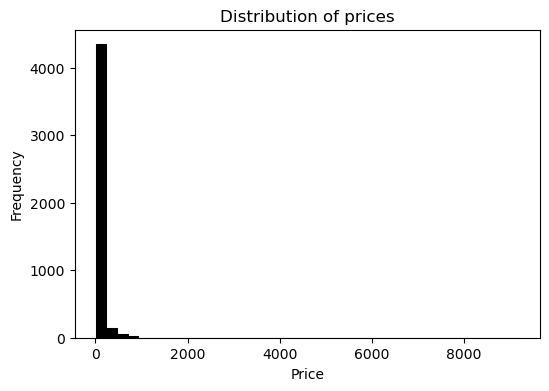

In [18]:
plt.figure(figsize=(6, 4))

sns.histplot(data.WinePrice, bins=40, color='black', alpha=1)
plt.ylabel('Frequency')
plt.xlabel('Price')
plt.title('Distribution of prices')

plt.show()

In [21]:
data.RegionalVariety.unique()

array(['Côte de Beaune White', 'Chardonnay', 'White', 'Riesling',
       'Rioja White', nan, 'White Blend', 'Chablis', 'Chenin Blanc',
       'Condrieu', 'Sauvignon Blanc', 'Vin Jaune', 'Pinot Gris',
       'Macônnais White', 'Gavi', 'Pinot Blanc', 'Grüner Veltliner',
       'Gewürztraminer', 'Viognier', 'Albariño', 'Verdejo',
       'Vinho Verde White', 'Pinot Grigio', 'Muscadet', 'Soave',
       'Côte Chalonnaise White', 'Müller Thurgau', 'Grauburgunder',
       'Saint-Péray', 'Torrontes', 'Moscatel', 'Malagouzia'], dtype=object)

In [ ]:
# df['median_house_value'] = np.log1p(df.median_house_value)

In [ ]:
from sklearn.model_selection import train_test_split

df_full_train, df_test = train_test_split(data, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)